<a href="https://colab.research.google.com/github/patriciamediavilla/L1P2/blob/main/Copia_de_banco_ufv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PILAR ARIAS, YEDRA MARTÍN, PATRICIA MEDIAVILLA, AMAYA SARASA

<GRUPO 9>

#Práctica 2

##INTRODUCCIÓN

Esta es la segunda práctica del primer laboratorio. Dada una base de datos en formato .csv, se nos pide contestar a una serie de cuestiones. Para ello, lo primero que debemos hacer es cargar y leer la base de datos:

In [153]:
#Importamos las librerías y la base de datos necesarias

import numpy as np #numpy
import pandas as pd #pandas
import sklearn as sk #scikit-learn
import matplotlib.pyplot as plt #gráfica Matplotlib

df = pd.read_csv('banco_ufv.csv',sep=';')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Subimos la base de datos, df.info nos aporta la infomación que contiene la base de datos, vemos las variables, el tipo de las variables con las que trabajamos... y .head vamos a ver que foram tiene la base de datos y las primeras filas de esta.

Según se ha estudiado en clase, encontramos dos métodos para afrontarlo. Nos decantaremos por CRISP-DM. Las siglas para: CRoss-Industry Standard Process for Data Mining. 

Es un modelo de proceso de minería de datos que se utiliza en la industria. Es un marco de trabajo que define un proceso estandarizado para llevar a cabo proyectos de minería de datos, desde la definición del problema hasta la implementación y evaluación del resultado.

## Comprensión del negocio y definición del problema.

La sucursal del Banco Santander situada en el campus de la Universidad Francisco de Vitoria nos solicita hacer varios estudios de sus clientes. 

Para ello haremos uso de un dataset proporcionado por la propia sucursal que 
se puede encontrar en Moodle.






## Comprensión de los datos

La base de datos que utilizaremos consta de 45211 observaciones

Existen 17 tipos de atributos distintos entre ellos: age, job, marital y muchos más.

Siguiendo las especificaciones dadas, para poder resolver todas las dudas que se nos plantearán solo requeriremos trabajar con los siguientes 4 atributos.

- age (edad)
- education (nivel de educación)
- balance (balance de la cuenta)
- duration (tiempo que llevan como clientes)

Por lo tanto seguiremos adelante solo considerando estos 4 atributos, lo que positivamente afectará nuestra rapidez a la hora de avanzar en la resolución de los problemas planteados.

In [154]:
from pandas.core.groupby.ops import DataFrame
#Reducimos nuestra base da datos a las varibales necesarias
df=df[['age','education','balance','duration']]
df.head()

,age,education,balance,duration
0,58,tertiary,2143,261
1,44,secondary,29,151
2,33,secondary,2,76
3,47,unknown,1506,92
4,33,unknown,1,198


## Preparación de los datos

Para poder trabjar con los datos, lo primero que debemos hacer es observar si todos los datos son correctos, si son útiles, ver maneras de normalizarlos para optimizar el algoritmo...

Lo primero que vamos a ver es sie stán completos, es decir si existen NaN en nuestra base de datos.

In [155]:
age_nan = df['age'].isna().sum()
print(f"La cantidad de NaN que existen en la variable age es:{age_nan}")
education_nan = df['education'].isna().sum()
print(f"La cantidad de NaN que existen en la variable education es:{education_nan}")
balance_nan = df['balance'].isna().sum()
print(f"La cantidad de NaN que existen en la variable balance es:{balance_nan}")
duration_nan = df['duration'].isna().sum()
print(f"La cantidad de NaN que existen en la variable duration es:{duration_nan}")

La cantidad de NaN que existen en la variable age es:0
La cantidad de NaN que existen en la variable education es:0
La cantidad de NaN que existen en la variable balance es:0
La cantidad de NaN que existen en la variable duration es:0


En ninguna de nuestras variables hay datos faltantes, pero vamos a representarlas con un diagrama de cajas para ver si hay outliers y para entender mejro como se distribuyen los datos. ESto lo haremos con las variables: age, balnace y duration ya que eduaction no es una variable numérica y no se puede aplicar este método a esta variable en concreto.

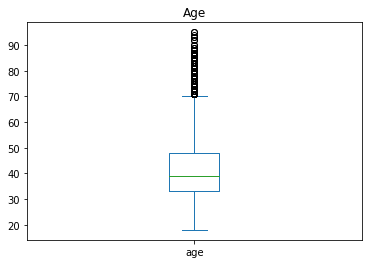

In [156]:
df['age'].plot(kind='box', title='Age')

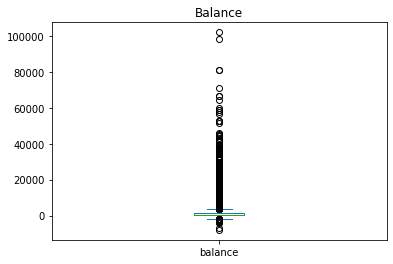

In [157]:
df['balance'].plot(kind='box', title='Balance')

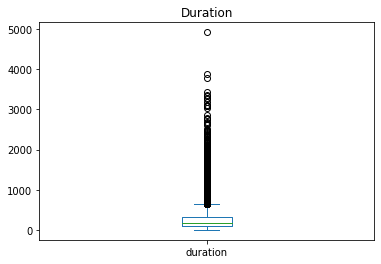

In [158]:
df['duration'].plot(kind='box', title='Duration')

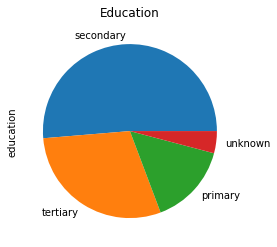

In [159]:
df['education'].value_counts().plot(kind='pie', title='Education')

Al observar esta gráfica, además de ver las probabilidades de cada tipo de educación también observamos que no se se sabe la educaión que tiene una parte de nuestra base de datos, ahora vamos a estudair cuál es ese porcentaje.

In [160]:
df['education'].value_counts()


secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

Ahora, sabemosa parte de los niveles, cuales son las cantidades que están dentro de cada uno de los niveles:


1.   Primaria = 6851   
2.   Secundaria = 23202   
3.   Terciaria = 13301    
4.   Desconocida = 1857

###Cómo lidiar con datos faltantes

Según el proceso CRISP-DM (Cross-Industry Standard Process for Data Mining), las opciones para lidiar con datos faltantes en bases de datos son las siguientes:
1.	Eliminación: Eliminar las filas o columnas con datos faltantes.
2.	Imputación: Reemplazar los valores faltantes con valores estimados o calculados. Por ejemplo, la imputación media o mediana puede ser utilizada para reemplazar los valores faltantes en una columna con el valor promedio o mediana de esa columna.
3.	Interpolación: Interpolar los valores faltantes utilizando una técnica de estimación, como la interpolación lineal o spline.
4.	Modelos predictivos: Utilizar modelos predictivos para estimar los valores faltantes a partir de los datos disponibles.
5.	Algoritmos de aprendizaje no supervisado: Utilizar algoritmos de clustering o de reducción de dimensionalidad para identificar patrones en los datos y utilizarlos para estimar los valores faltantes.
Es importante elegir la técnica adecuada para lidiar con los datos faltantes, considerando el tipo de datos, la cantidad de datos faltantes y su impacto en los resultados de análisis. Es recomendable investigar y evaluar varias opciones antes de tomar una decisión.



Ahora, tenemos que decidir cómo vamos a gestionar aquellos clientes cuyo nivel de educación es desconocido. 

Debido a que nuestro primer problema trata de ilustrar la correlación entre el nivel de educación y el dinero que tienen, es importante que hagamos algo con ellos en mente.

Desconocemos la razón por la cual esta infomación es desconocida, agravado por el hecho de desconocer el criterio usado para agrupar a la gente en dichos niveles. 

¿Tendrán un nivel de educación inferior al requerido para poder haber obtenido el nivel primario? Tal vez no querían divulgar dicha información...



Existen varias opciones respecto a como lidiar con NaN.
Una opción sería ver si podríamos eliminar aquellos clientes con nivel de educación desconocida.

In [161]:
df['education'].value_counts().sum()

45211

In [162]:
print("Porcentage de todos los clientes con nivel de educación desconocido: {:.2f}%".format((1857/45211)*100))

Porcentage de todos los clientes con nivel de educación desconocido: 4.11%


Finalmente, hemos decidimos eliminar los valores ya que el porcentaje es batante bajo, además considerando la cantidad de datos que tenemos podemos eliminarlas. También a feavor de nuestar decisión cabe decir que no nos podemos inventar los estudios de una persona, no sabemos cual es el motivo de no saberlo.

In [163]:
df = df.drop(df[df['education']=='unknown'].index)
df.reset_index(inplace=True, drop=True)

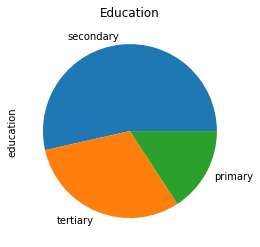

In [164]:
df['education'].value_counts().plot(kind='pie', title='Education')

Como observamos en la gráfica ya no tenemos observaciones en las que no sepamos las educaión de una persona.

In [165]:
df.head()

,age,education,balance,duration
0,58,tertiary,2143,261
1,44,secondary,29,151
2,33,secondary,2,76
3,35,tertiary,231,139
4,28,tertiary,447,217


#EJERCICIO 1

¿Está el nivel de estudios está directamente relacionado con el saldo de cada cliente en la cuenta?

Para ello estableceremos 3 rangos numéricos: los que tienen deudas, la gente que tiene unos ahorros normales (en positivo, pero menos de 10.000 euros) y los que disponen de suficientes ahorros como para ofrecerles paquetes de inversión (aquellos en positivo con más de 10.000 euros). 

In [166]:
filas=len(df.axes[0])

for i in range (filas):
  if df['balance'][i]<0:
    df['balance'][i]='Endeudados'
  elif df['balance'][i]>10000:
    df['balance'][i]='Potencial Paquete de Inversion'
  else:
    df['balance'][i]='Balance Positivo'


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

<ipython-input-166-72697525b8fb>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balance'][i]='Balance Positivo'
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Se han truncado las últimas 5000 líneas del flujo de salida.
38354
38355
38356
38357
38358
38359
38360
38361
38362
38363
38364
38365
38366
38367
38368
38369
38370
38371
38372
38373
38374
38375
38376
38377
38378
38379
38380
38381
38382
38383
38384
38385
38386
38387
38388
38389
38390
38391
38392
38393
38394
38395
38396
38397
38398
38399
38400
38401
38402
38403
38404
38405
38406
38407
38408
38409
38410
38411
38412
38413
38414
38415
38416
38417
38418
38419
38420
38421
38422
38423
38424
38425
38426
38427
38428
38429
38430
38431
38432
38433
38434
38435
38436
38437
38438
38439
38440
38441
38442
38443
38444
38445
38446
38447
38448
38449
38450
38451
38452
38453
38454
38455
38456
38457
38458
38459
38460
38461
38462
38463
38464
38465
38466
38467
38468
38469
38470
38471
38472
38473
38474
38475
38476
38477
38478
38479
38480
38481
38482
38483
38484
38485
38486
38487
38488
38489
38490
38491
38492
38493
38494
38495
38496
38497
38498
38499
38500
38501
38502
38503
38504
38505
38506
38507
38508
38509
385

Ya sabemos que tendremos que agrupar a los clientes en 3 rangos numéricos según el dinero que actualmente tengan en su cuenta de banco, pero previo a visualizar los datos, 

In [167]:
df.head()

,age,education,balance,duration
0,58,tertiary,Balance Positivo,261
1,44,secondary,Balance Positivo,151
2,33,secondary,Balance Positivo,76
3,35,tertiary,Balance Positivo,139
4,28,tertiary,Balance Positivo,217


In [168]:
df['balance'].value_counts()

Balance Positivo                  38927
Endeudados                         3638
Potencial Paquete de Inversion      789
Name: balance, dtype: int64

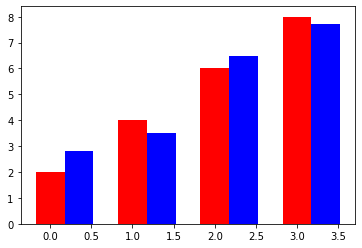

In [169]:
import matplotlib.pyplot as plt
import numpy as np
A=[2,4,6,8]
B=[2.8,3.5,6.5,7.7]

X=np.arange(len(A))
plt.bar(X,A,color="red",width=0.35)
plt.bar(X+0.35,B,color="blue",width=0.35)
plt.show()


¿Qué diagrama has usado y por qué? 


¿Cuál es el grupo que más destaca? 

Aporta toda la información que creas necesaria que puedes obtener de la gráfica.

#EJERCICIO 2

En este ejercicio nos piden que dividamos las edades, es decir que pase de ser una variable númerica a que sea una variable categórica. En concreto nosotros vamosa hacer la división de esta manera: los menores de 30 años van a ser alumnos, de 30 a 45 años serán trabajadores jóvenes, de 46 a 65 trabajadores veteranos, y por último los trabajdores no vinculados a la universidad. 

¿Cuál es el grupo de edad que tiene más clientes?


In [170]:
#Establecemos las diferentes clases que queremos crear.
filas=len(df.axes[0])
for i in range (filas):
    if df['age'][i]<30:
        df['age'][i]='Alumnos'
    elif df['age'][i]>=30 and df['age'][i]<=45:
        df['age'][i]='Trabajadores jóvenes'
    elif df['age'][i]>=46 and df['age'][i]<=65:
        df['age'][i]='Trabajadores veteranos'
    else:
        df['age'][i]='Cliente no vinvulado'


<ipython-input-170-9d7c2f0a8a5e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'][i]='Trabajadores veteranos'
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Una vez transformada la variable vamos a compar cuantos tipo de cada hay.

In [171]:
count = df['age'].value_counts()

Ahora, además de saber cuales son las categorías que hemos creado, sabemos cuantas observaciones pertenercen a cada categoría.

- Alumnos: 5273
- Trabajadores jóvenes: 25490
- Trabajadores veteranos: 13697
- Cliente no vinculado: 751

Al visualizar estos datos se nos hace raro pensar que en un banco situado dentro de la universidad donde la mayoría de las personas que pasan por delente sean alumnos, que sea la segunda categoría con menos frecuencia.

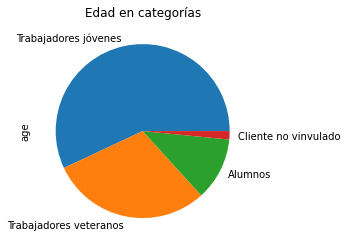

In [172]:
df['age'].value_counts().plot(kind='pie', title='Edad en categorías')

Observamos que hay bastantes más valores de trabajadores jóvenes, seguido de trabajadores veteranos.

#EJERCICIO 3

En este ejercicio lo que queremos hacer es ver la duración de los clientes del banco Santander en la sucursal de la UFV. Para eso lo que vamos a hacer es pasar los días a años y una vez en año vamos a graficarlo para ver que tipo de clientes son los que tiene esta sucursal.

In [173]:
#Convertimos la columna duration a float 
#para que la operación salga con decimales
df['duration'] = df['duration'].astype (float)
filas=len(df.axes[0])
for i in range(filas):
  df['duration'][i] = df['duration'][i]/365.25

<ipython-input-173-82263181334a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'][i] = df['duration'][i]/365.25


Una vez en decimales lo graficamos.

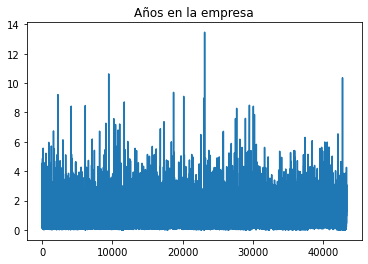

In [177]:
df['duration'].plot(title='Años en la empresa')

#INTENTAR TRASPONERLA

In [175]:
df

,age,education,balance,duration
0,Trabajadores veteranos,tertiary,Balance Positivo,0.714579
1,Trabajadores jóvenes,secondary,Balance Positivo,0.413415
2,Trabajadores jóvenes,secondary,Balance Positivo,0.208077
3,Trabajadores jóvenes,tertiary,Balance Positivo,0.380561
4,Alumnos,tertiary,Balance Positivo,0.594114
...,...,...,...,...
43349,Trabajadores veteranos,tertiary,Balance Positivo,2.674880
43350,Cliente no vinvulado,primary,Balance Positivo,1.248460
43351,Cliente no vinvulado,secondary,Balance Positivo,3.085558
43352,Trabajadores veteranos,secondary,Balance Positivo,1.390828
